In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Topics we'll be covering in this tutorial

1. boxplots, IQR, quartiles, outliers detection
2. correlation plots
3. histograms 
4. Normalisation techniques (multiply, min-max norm to convert all into one form, z transform etc)
5. Playing around with plotting (plot size, legend, title, colors, plot stacking)
6. Distribution plots, types of skew, skew check through mean, median and mode, skew removal (log, square etc)
7. Visualising categorical data
8. What kind of plot should I be using? 
9. And more 

## Some important shortcuts to speed up experimentation
Watch and learn

* D, D - delete
* M - convert to markdown cell
* Y - convert to code cell
* A - add cell above
* B - add cell below
* Z - undo
* Shift + enter - run

In [4]:
data = pd.read_csv("grocery_dataset.csv")
data.Variant

0              1 Kg
1              1 Kg
2              1 Kg
3       Whole Bunch
4       Whole Bunch
           ...     
1822        500 Gms
1823       21.1 Gms
1824        500 Gms
1825         40 Gms
1826          1 Ltr
Name: Variant, Length: 1827, dtype: object

In [5]:
data["quant"] = data.Variant.apply(lambda x: re.match("([0-9]+ [A-z]+)", x)[0] if re.match("([0-9]+ [A-z]+)", x) is not None else None)

In [6]:
data

,title,sku_id,Variant_id,Variant,category,sub_category,quant
0,Potato,5c0e70078d92d07fdfc24839,5c0e70078d92d07fdfc2483a,1 Kg,Fresh Vegetables,"Potatoes, Onions, Tomatoes",1 Kg
1,Onion,5c1212046d62156290e94b08,5c2311b266af1577818acb9b,1 Kg,Fresh Vegetables,"Potatoes, Onions, Tomatoes",1 Kg
2,Tomato,5c0e70078d92d07fdfc24863,5c6aa49f8fb99d101223a98d,1 Kg,Fresh Vegetables,"Potatoes, Onions, Tomatoes",1 Kg
3,Coriander Leaves,5c0e70078d92d07fdfc247d9,5d6e093f4fce012c1d0fe96b,Whole Bunch,Fresh Herbs and Seasoning,Indian Herbs,None
4,Mint Leaves,5c0e70078d92d07fdfc2481d,5d6e093e4fce012c1d0fe113,Whole Bunch,Fresh Herbs and Seasoning,Indian Herbs,None
...,...,...,...,...,...,...,...
1822,Red Brinjal,5d2c2b719e1975027f936d07,5d2c2b719e1975027f936d09,500 Gms,Fresh Vegetables,"Beans, Brinjals, Okra",500 Gms
1823,Nestle Guru Munch,5be2940148e1c43d79561c48,5bfbb76f7f2d4634fed2c1fc,21.1 Gms,Chocolates & Ice-Cream,Bar Chocolates,None
1824,Tang Orange Instant Drink Mix,5bf85867269a0f1dd3c372e7,5bf85867269a0f1dd3c372e8,500 Gms,Beverages,Fruit Juice & Drinks,500 Gms
1825,Haldiram Moong Dal,5bf85869269a0f1dd3c37ee5,5c3f6b877d95600ff27b9518,40 Gms,Snacks & Frozen Food,Snacks,40 Gms


## Distribution skew
Your data can be skewed, as nature is always biased towards the dominant component. If you take dietary habits, the gradient of vegetarianism will be highly skewed, with very few who are vegans. If you take distribution of heights, there will be very few who are above 6ft and so. 

### Types of skew
Skewness can be towards the left or towards the right. It is not easy to observe skew by staring at your data, you need to visualise it. 

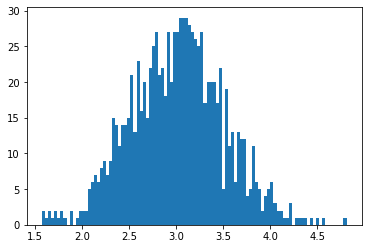

In [8]:
q = np.random.normal(3, 0.5, 1000)
plt.hist(q, bins = 100)
plt.show()

I was too lazy to find datasets with skew, so I simulated it for you. Logarithmic and polynomial functions can be used to remove skew from data, and we'll see how that works by introducing skew using these functions!  

/Users/shreyasgupta/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


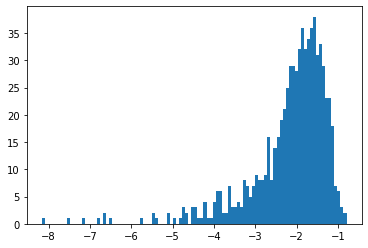

In [9]:
plt.hist(np.log(np.log(np.log(q))), bins = 100)
plt.show()

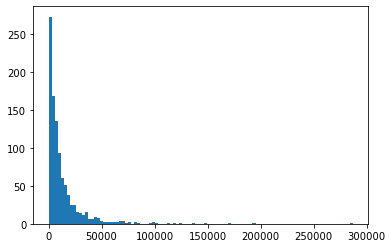

In [10]:
plt.hist(np.power(q, 8), bins = 100)
plt.show()

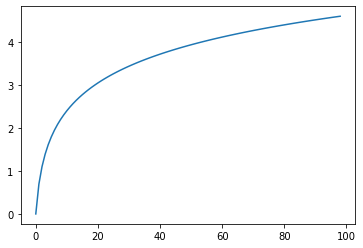

In [11]:
plt.plot(np.log(np.arange(1, 100, 1)))
plt.show()

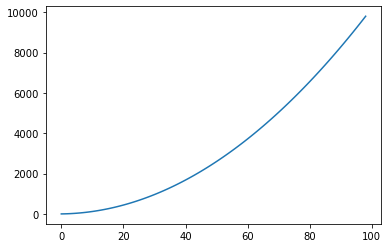

In [12]:
plt.plot(np.power(np.arange(1, 100, 1), 2))
plt.show()

## Boxplots

Boxplots are used to better understand the parameters of a distribution. It essentially contains two tails or whiskers, the inter quartile range (IQR), the 1st and the 3rd quartile boxes, the median line and outlier dots.  

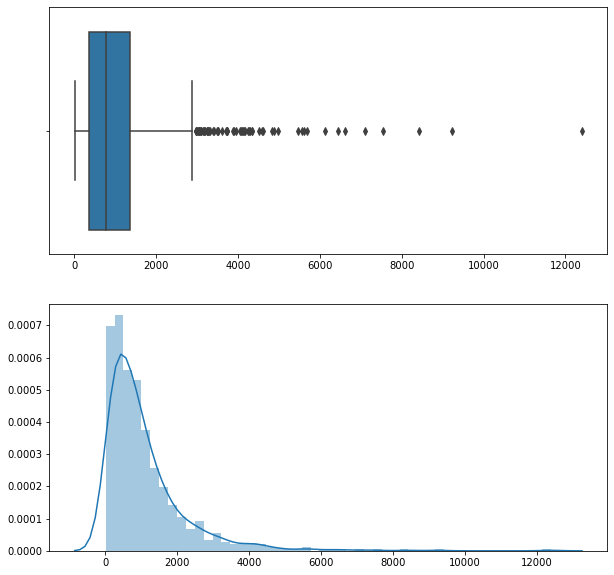

<Figure size 1440x720 with 0 Axes>

In [13]:
fig, ((row1), (row2)) = plt.subplots(2, 1, figsize=(10, 10))
plt.figure(figsize=(20,10))
sns.boxplot(np.power(q, 6), ax = row1)
sns.distplot(np.power(q, 6), ax = row2)
plt.show()

## When to use what plots?

This is a very interesting question, especially given that you guys didn't even ask this. We have an entire course around data visualisation so I'll try to summarise the whole course in this cell block.

I feel this section is very important in the sense that in the industry a lot of data analysis goes in for problematising something and actually working on it, and you need to show visualisations not numbers when discussing with stakeholders and management. 

There are no hard and fast rules out there but there are a couple of things to consider 
* Think about what kind of data you're trying to visualise and what you're trying to convey from it. 
* Think about the colors. A simple rule to follow is to use complementary colors for different kinds of objects and supplementary colors for heatmaps, which you can pick by creating regular polygons over a color wheel. 
* Scale is important. 
* Too many categories? go for bar plot. Few categories? go for piechart. 
* Observe changes over time? line plot. 
* Need to visualise groupby objects? Use sankey diagrams. 
* Relationship between two variables? Use correlation plot.